In [58]:
import numpy as np
import pandas as pd

'20.8 ~ 10월 기준 배달식선호 및 건강관심 성향에 따른' 20.9 ~ 11월 외식업종 소비패턴(외식업종별 소비 건수 합계)

※ 배달식선호/건강관심 성향 : 당사가 회원의 소비데이터로 모델링하여 추정한 고객의 특성.

   지수를 20 등급화(1등급이 제일 高)

In [59]:
df=pd.read_excel('DATA_SSC_DELIVERY_HEALTH_Free.xlsx')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   소비년월      100 non-null    int64 
 1   거주지_광역시도  100 non-null    object
 2   거주지_시군구   100 non-null    object
 3   배달식선호등급   100 non-null    int64 
 4   건강관심도등급   100 non-null    int64 
 5   연령대       100 non-null    object
 6   성별        100 non-null    object
 7   외식업종분류    100 non-null    object
 8   평일휴일      100 non-null    object
 9   소비건수합계    100 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


In [61]:
df.head()

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
0,202010,서울,양천구,12,6,40대,남성,한식,휴일,12
1,202009,서울,강동구,2,20,30대,여성,한식,휴일,40
2,202009,경기,김포시,10,16,40대,남성,디저트,휴일,49
3,202010,서울,성북구,1,16,20대,남성,중식,평일,25
4,202009,서울,송파구,7,15,30대,남성,한식,평일,47


In [62]:
df['연령대'].value_counts()

30대      30
40대      26
50대      20
20대      18
60대이상     6
Name: 연령대, dtype: int64

In [63]:
ord = {'20대':20,'30대':30,'40대':40,'50대':50, '60대이상':60}
df['연령대'] = df.연령대.map(ord)

In [64]:
df['연령대'].value_counts()

30    30
40    26
50    20
20    18
60     6
Name: 연령대, dtype: int64

In [65]:
df.head()

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
0,202010,서울,양천구,12,6,40,남성,한식,휴일,12
1,202009,서울,강동구,2,20,30,여성,한식,휴일,40
2,202009,경기,김포시,10,16,40,남성,디저트,휴일,49
3,202010,서울,성북구,1,16,20,남성,중식,평일,25
4,202009,서울,송파구,7,15,30,남성,한식,평일,47


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   소비년월      100 non-null    int64 
 1   거주지_광역시도  100 non-null    object
 2   거주지_시군구   100 non-null    object
 3   배달식선호등급   100 non-null    int64 
 4   건강관심도등급   100 non-null    int64 
 5   연령대       100 non-null    int64 
 6   성별        100 non-null    object
 7   외식업종분류    100 non-null    object
 8   평일휴일      100 non-null    object
 9   소비건수합계    100 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [67]:
df.corr()

,소비년월,배달식선호등급,건강관심도등급,연령대,소비건수합계
소비년월,1.000000,0.226873,-0.365778,0.285350,-0.000231
배달식선호등급,0.226873,1.000000,-0.787705,0.849169,-0.287555
건강관심도등급,-0.365778,-0.787705,1.000000,-0.766592,0.181588
연령대,0.285350,0.849169,-0.766592,1.000000,-0.325633
소비건수합계,-0.000231,-0.287555,0.181588,-0.325633,1.000000


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:xlabel='건강관심도등급', ylabel='Count'>

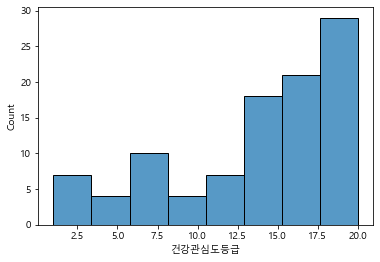

In [70]:
sns.histplot(data = df, x = '건강관심도등급')

→ 건강에 관심이 적은 사람이 많음(1등급이 제일 高)

<AxesSubplot:xlabel='배달식선호등급', ylabel='Count'>

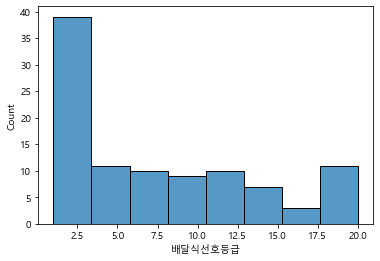

In [71]:
sns.histplot(data = df, x = '배달식선호등급')

→ 배달을 선호하는 사람이 많음

<AxesSubplot:>

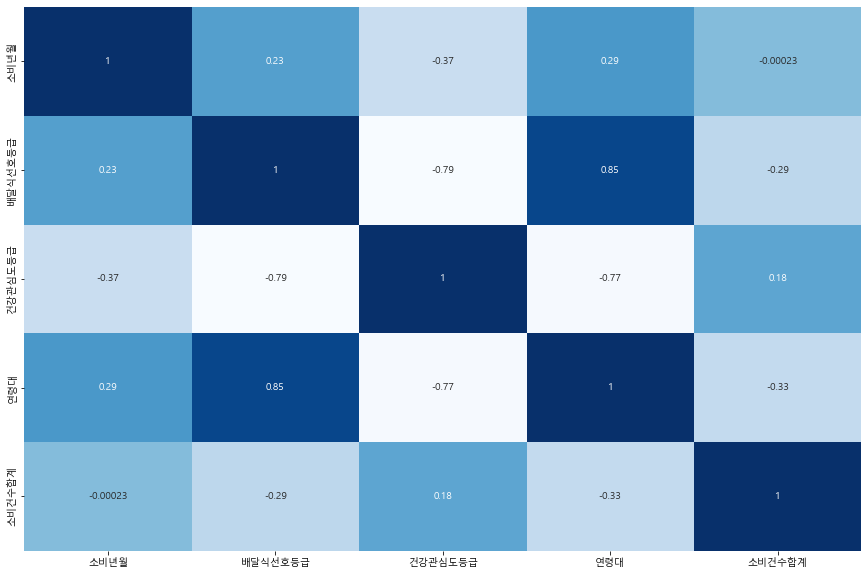

In [72]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),cbar= False,annot = True, cmap= 'Blues')

'건강관심도등급'과 '연령대'는 강한 음의 상관관계를 보인다\
또한 '건강관심도등급'과 '배달식선호등급' 역시 강한 음의 상관관계를 보인다